🎯 <span style="color: orange; font-size: 24px; font-weight: bold;">Objectif :</span>

Implémenter l'algorithme **Proximal Policy Optimization (PPO)** pour entraîner un agent à résoudre l’environnement **Taxi-v3** (problème de transport de passagers).

🔍 <span style="color: teal; font-size: 22px; font-weight: bold;">Contenu :</span>

1. Initialisation des **tables de politique et de valeur**.  
2. **Collecte d'épisodes** avec exploration.  
3. **Mise à jour de la politique via PPO avec clipping**.  
4. **Évaluation des performances**.

🧩 <span style="color: yellow; font-size: 24px; font-weight: bold;">Exercices :</span>
- **Exercice 1 :** <span style="color: #00b4d8; font-size: 20px;">Découverte de l’Environnement  </span> 🛣️

In [ ]:
import numpy as np

class TrafficEnvironment:
    def __init__(self):
        self.state = np.random.randint(0, 10, size=4)
        self.current_light = 0

    def step(self, action):
        if action == 1:
            self.current_light = 1 - self.current_light

        if self.current_light == 0:
            passed = min(self.state[0], np.random.randint(1, 5)) + min(self.state[1], np.random.randint(1, 5))
            self.state[0] = max(0, self.state[0] - passed)
            self.state[1] = max(0, self.state[1] - passed)
        else:
            passed = min(self.state[2], np.random.randint(1, 5)) + min(self.state[3], np.random.randint(1, 5))
            self.state[2] = max(0, self.state[2] - passed)
            self.state[3] = max(0, self.state[3] - passed)

        new_cars = np.random.randint(0, 3, size=4)
        self.state = np.clip(self.state + new_cars, 0, 9)
        reward = passed

        return self.state.copy(), reward

    def reset(self):
        self.state = np.random.randint(0, 10, size=4)
        self.current_light = 0
        return self.state.copy()

In [ ]:
env = TrafficEnvironment()
state = env.reset()
for i in range(10):
    action = 0
    next_state, reward = env.step(action)
    print(f"Etat : {next_state},Recompense : {reward}")

Etat : [2 4 2 3],Recompense : 4
Etat : [0 2 2 5],Recompense : 4
Etat : [0 3 2 6],Recompense : 1
Etat : [2 4 2 7],Recompense : 1
Etat : [2 0 3 7],Recompense : 5
Etat : [2 2 4 7],Recompense : 2
Etat : [1 1 4 8],Recompense : 4
Etat : [2 2 6 8],Recompense : 2
Etat : [1 0 8 9],Recompense : 3
Etat : [ 1  2  8 10],Recompense : 1


- **Exercice 2 :** <span style="color: #00b4d8; font-size: 20px;">Implémentation de Q-Learning </span> 🔄


In [ ]:
import numpy as np

q_table = np.zeros((10, 10, 10, 10, 2))

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    global q_table
    rewards_per_episode = []

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))
        total_reward = 0

        for _ in range(50):
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Exploration
            else:
                action = np.argmax(q_table[state])  # Exploitation

            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))


            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])

            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)
        epsilon *= decay  # Réduction de l'exploration

    return rewards_per_episode

env = TrafficEnvironment()
q_learning_rewards = train_q_learning(env)

- **Exercice 3 :** <span style="color: #00b4d8; font-size: 20px;">Implémentation de SARSA</span> ⚙️

In [ ]:
import numpy as np

q_table = np.zeros((10, 10, 10, 10, 2))

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    global q_table
    rewards_per_episode = []

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))

        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])  # Exploration
        else:
            action = np.argmax(q_table[state])  # Exploitation

        total_reward = 0

        for _ in range(50):
            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))

            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])
            else:
                next_action = np.argmax(q_table[next_state])

            q_table[state][action] += alpha * (reward + gamma * q_table[next_state][next_action] - q_table[state][action])

            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)
        epsilon *= decay

    return rewards_per_episode

sarsa_rewards = train_sarsa(env)

- **Exercice 4 :** <span style="color: #00b4d8; font-size: 20px;">Analyse et Visualisation des Résultats</span> 📉

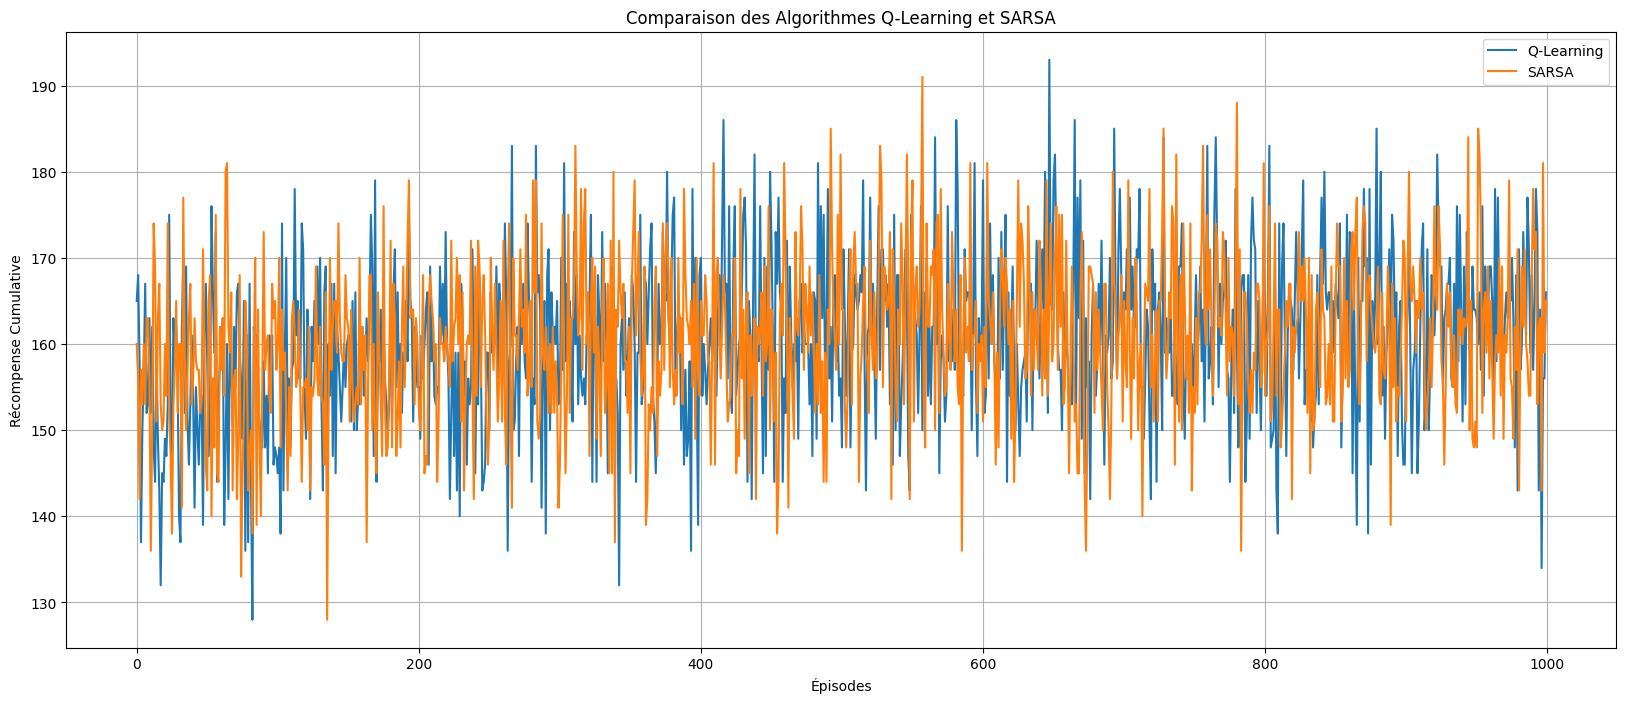

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(q_learning_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.title("Comparaison des Algorithmes Q-Learning et SARSA")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_best_policy(q_table):
    return np.argmax(q_table, axis=-1)  # La meilleure action pour chaque état

best_policy_q_learning = extract_best_policy(q_table)
best_policy_sarsa = extract_best_policy(q_table)

print("Meilleure politique Q-Learning :")
print(best_policy_q_learning[:2, :2, :2, :2])  # Affichage partiel

print("\nMeilleure politique SARSA :")
print(best_policy_sarsa[:2, :2, :2, :2])  # Affichage partiel

Meilleure politique Q-Learning :
[[[[1 0]
   [0 1]]

  [[0 1]
   [0 1]]]


 [[[0 1]
   [1 0]]

  [[1 0]
   [1 0]]]]

Meilleure politique SARSA :
[[[[1 0]
   [0 1]]

  [[0 1]
   [0 1]]]


 [[[0 1]
   [1 0]]

  [[1 0]
   [1 0]]]]
